In [1]:
# import necessary libraries
import time
import zipfile
import cProfile
import multiprocessing

from datetime import date
from datetime import datetime
from datetime import timedelta
from dateutil import relativedelta

import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd

from scipy import interpolate

import joypy

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FuncFormatter
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

# http://stanford.edu/~mwaskom/software/seaborn/
import seaborn as sns

import plotly.graph_objects as go

# from prophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_absolute_error

import wrangle as wr
import preprocessing as pr
import explore as ex

In [2]:
# show all columns in a dataframe
pd.set_option('display.max_columns', None)

# visualization preferences
plt.rc("figure", figsize=(16, 8))
sns.set_palette("colorblind")

# telling Matplotlib to automatically handle the layout of your figures (charts) for you
# can be helpful in creating better-looking visualizations without manual adjustments.
plt.rcParams["figure.autolayout"] = True

In [3]:
print("Number of CPUs:", multiprocessing.cpu_count())

Number of CPUs: 8


---

# Global Variables & Functions

In [4]:
# calc last month
last_month = pd.to_datetime(datetime.today().strftime("%Y-%m-%d")) + MonthEnd(-1)

In [5]:
# start time
t0 = time.time()

---

# Sankey Diagram

In [6]:
# df = pd.read_csv("pandl_data_2024-07-10_v3 - Sheet1.csv")
# df

In [7]:
# df.drop(columns=["Unnamed: 0"], inplace=True)
# df

In [8]:
# df["amount"] = df.amount.str.replace(",","").astype(float)
# df.info()

In [9]:
# sankey_diagram_links_list = [
#     (
#         df[df.master_target.isna() == False].source.values[n],
#         i,
#         df[df.master_target.isna() == False].master_target.values[n],
#     )
#     for n, i in enumerate(df[df.master_target.isna() == False].master_source)
# ]
# sankey_diagram_links_list

In [10]:
# df.info()

In [11]:
# # Define the nodes
# nodes = dict(label=df.source, color=df.color)

# # Define the links
# links = dict(
#     source=[
#         np.where(df.source.unique() == i[1])[0][0] for i in sankey_diagram_links_list
#     ],
#     target=[
#         np.where(df.source.unique() == i[2])[0][0] for i in sankey_diagram_links_list
#     ],
#     value=[
#         df[(df.source == i[0]) & (df.master_target == i[2])].amount.sum()
#         for i in sankey_diagram_links_list
#     ],
# )

# # Create the Sankey diagram
# fig = go.Figure(
#     data=[
#         go.Sankey(
#             node=dict(
#                 pad=40,
#                 thickness=20,
#                 line=dict(color="black", width=0.5),
#                 label=nodes["label"],
#                 color=nodes["color"],
#             ),
#             link=dict(
#                 source=links["source"],
#                 target=links["target"],
#                 value=links["value"],
#                 label=[f"${val:,.0f}" for val in links["value"]],
#             ),
#         )
#     ]
# )

# # Update layout settings
# fig.update_layout(
#     title_text=f"""Make Believe Business P&L - {last_month.strftime("%B %Y")}""",
#     font=dict(size=12, color="black"),
#     plot_bgcolor="rgba(0,0,0,0)",
# )

# # Show the figure
# fig.show()

---

# Bubble Chart

In [12]:
# Define the parameters
num_customers = 50000
months = pd.date_range(start='2023-04-01', periods=14, freq='MS')

# List of new product codes provided by the user
new_product_codes = [
    'product_3', 'product_13', 'product_17', 'product_15', 'product_0', 
    'product_14', 'product_9', 'product_10', 'product_7', 'product_20',
    'product_5', 'product_4', 'product_19', 'product_1', 'product_8', 
    'product_2', 'product_11', 'product_12', 'product_6', 'product_16',
    'product_18'
]

# Update the data generation with new product codes
updated_data_with_new_codes = []

for i in range(num_customers):
    account_code = f"ACC{i+1:03d}"
    company_name = f"Company {chr(65 + i)}"
    currency = "USD"
    
    # Select 3 random product codes for each customer
    assigned_product_codes = np.random.choice(new_product_codes, 3, replace=False)
    
    for product_code in assigned_product_codes:
        row = {
            'account_code': account_code,
            'company_name': company_name,
            'product_code': product_code,
            'charge_description': '',
            'currency': currency
        }
        revenue = np.random.randint(0, 2, size=len(months))
        for month, rev in zip(months, revenue):
            row[month.strftime('%Y-%m-%d')] = rev
        
        updated_data_with_new_codes.append(row)

# Create a DataFrame
df = pd.DataFrame(updated_data_with_new_codes)

# Display the updated DataFrame
df

,account_code,company_name,product_code,charge_description,currency,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01
0,ACC001,Company A,product_2,,USD,1,1,0,0,0,0,1,1,1,1,0,1,1,0
1,ACC001,Company A,product_12,,USD,0,1,0,1,0,1,1,1,0,1,0,1,1,0
2,ACC001,Company A,product_3,,USD,0,0,0,1,1,1,1,0,0,1,1,1,1,0
3,ACC002,Company B,product_20,,USD,1,1,0,1,0,1,1,0,1,1,1,1,0,0
4,ACC002,Company B,product_10,,USD,0,1,0,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,ACC49999,Company 쎏,product_19,,USD,1,1,1,1,0,0,0,1,1,0,0,1,0,0
149996,ACC49999,Company 쎏,product_6,,USD,1,1,0,0,1,0,0,1,1,1,1,0,0,1
149997,ACC50000,Company 쎐,product_3,,USD,1,1,1,0,0,0,1,1,0,0,0,1,1,0
149998,ACC50000,Company 쎐,product_18,,USD,1,0,1,0,1,0,0,1,0,1,1,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   account_code        150000 non-null  object
 1   company_name        150000 non-null  object
 2   product_code        150000 non-null  object
 3   charge_description  150000 non-null  object
 4   currency            150000 non-null  object
 5   2023-04-01          150000 non-null  int64 
 6   2023-05-01          150000 non-null  int64 
 7   2023-06-01          150000 non-null  int64 
 8   2023-07-01          150000 non-null  int64 
 9   2023-08-01          150000 non-null  int64 
 10  2023-09-01          150000 non-null  int64 
 11  2023-10-01          150000 non-null  int64 
 12  2023-11-01          150000 non-null  int64 
 13  2023-12-01          150000 non-null  int64 
 14  2024-01-01          150000 non-null  int64 
 15  2024-02-01          150000 non-null  int64 
 16  20

In [14]:
# melting mrr data
df = wr.melt_recurly_mrr_data(df)
df

,account_code,company_name,product_code,charge_description,currency,month,mrr
0,ACC001,Company A,product_2,,USD,2023-04-01,1
1,ACC001,Company A,product_12,,USD,2023-04-01,0
2,ACC001,Company A,product_3,,USD,2023-04-01,0
3,ACC002,Company B,product_20,,USD,2023-04-01,1
4,ACC002,Company B,product_10,,USD,2023-04-01,0
...,...,...,...,...,...,...,...
2099995,ACC49999,Company 쎏,product_19,,USD,2024-05-01,0
2099996,ACC49999,Company 쎏,product_6,,USD,2024-05-01,1
2099997,ACC50000,Company 쎐,product_3,,USD,2024-05-01,0
2099998,ACC50000,Company 쎐,product_18,,USD,2024-05-01,0


In [15]:
# converting date features from an object to a datetime64[ns]
df["month"] = pd.DatetimeIndex(df.month + "-01")

# reordering features
df = df[
    [
        "month",
        "account_code",
        "company_name",
        "product_code",
        "charge_description",
        "currency",
        "mrr",
    ]
]

df = df[
    ~(  # filter out all credits and refunds from the data using `~`
        df.charge_description.str.contains("Credit")
        | df.charge_description.str.contains("Refund")
    )
]

# resetting index because we dropped rows in using the mask above
df.reset_index(inplace=True, drop=True)

print(f"""This DataFrame contains {df.shape[0]:,} rows and {df.shape[1]:,} columns. Sum of MRR column equals ${df.mrr.sum():,.2f}""")
df.head()

This DataFrame contains 2,100,000 rows and 7 columns. Sum of MRR column equals $1,050,218.00


,month,account_code,company_name,product_code,charge_description,currency,mrr
0,2023-04-01 01:00:00,ACC001,Company A,product_2,,USD,1
1,2023-04-01 01:00:00,ACC001,Company A,product_12,,USD,0
2,2023-04-01 01:00:00,ACC001,Company A,product_3,,USD,0
3,2023-04-01 01:00:00,ACC002,Company B,product_20,,USD,1
4,2023-04-01 01:00:00,ACC002,Company B,product_10,,USD,0


In [16]:
df["month"] = pd.to_datetime(df.month)
print(f"""This DataFrame contains {df.shape[0]:,} rows and {df.shape[1]:,} columns. Sum of MRR column equals ${df.mrr.sum():,.2f}""")
df.info()

This DataFrame contains 2,100,000 rows and 7 columns. Sum of MRR column equals $1,050,218.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100000 entries, 0 to 2099999
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   month               datetime64[ns]
 1   account_code        object        
 2   company_name        object        
 3   product_code        object        
 4   charge_description  object        
 5   currency            object        
 6   mrr                 int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 112.2+ MB


In [17]:
df.head()

,month,account_code,company_name,product_code,charge_description,currency,mrr
0,2023-04-01 01:00:00,ACC001,Company A,product_2,,USD,1
1,2023-04-01 01:00:00,ACC001,Company A,product_12,,USD,0
2,2023-04-01 01:00:00,ACC001,Company A,product_3,,USD,0
3,2023-04-01 01:00:00,ACC002,Company B,product_20,,USD,1
4,2023-04-01 01:00:00,ACC002,Company B,product_10,,USD,0


In [18]:
# this is the master list of plan code and plan names which will be joined to our main mrr schedule df
plan_codes_and_names = pd.read_csv("make_believe_product_codes_2024-07-11 - Sheet1.csv")
plan_codes_and_names

,plan_code,plan_name,plan_group,segment,plan_type
0,product_3,Make Believe Add-on Product 1,Make Believe Add-on Product 1,Make Believe Add-on Product 1,Add-on
1,product_13,Make Believe Add-on Product 1 (Discounted),Make Believe Add-on Product 1,Make Believe Add-on Product 1,Add-on
2,product_17,Enterprise,Enterprise,Enterprise,Base Plan
3,product_15,Sardius (Annual),Sardius,Stone,Base Plan
4,product_0,Sardius (Monthly),Sardius,Stone,Base Plan
5,product_14,Topaz (Annual),Topaz,Stone,Base Plan
6,product_9,Topaz (Monthly),Topaz,Stone,Base Plan
7,product_10,Carbuncle (Annual),Carbuncle,Stone,Base Plan
8,product_7,Carbuncle (Monthly),Carbuncle,Stone,Base Plan
9,product_20,Emerald (Annual),Emerald,Stone,Base Plan


In [19]:
# joing the main dataframe together with the master plan codes and names
df = pr.join_plan_codes_and_names_to_mrr_df(df, plan_codes_and_names)
print(f"""This DataFrame contains {df.shape[0]:,} rows and {df.shape[1]:,} columns. Sum of MRR column equals ${df.mrr.sum():,.2f}""")
df.head()

This DataFrame contains 2,100,000 rows and 11 columns. Sum of MRR column equals $1,050,218.00


,month,account_code,company_name,product_code,plan_name,plan_group,charge_description,segment,plan_type,currency,mrr
0,2023-04-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,USD,0
1,2023-05-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,USD,1
2,2023-06-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,USD,0
3,2023-07-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,USD,1
4,2023-08-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,USD,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100000 entries, 0 to 2099999
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   month               datetime64[ns]
 1   account_code        object        
 2   company_name        object        
 3   product_code        object        
 4   plan_name           object        
 5   plan_group          object        
 6   charge_description  object        
 7   segment             object        
 8   plan_type           object        
 9   currency            object        
 10  mrr                 int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 176.2+ MB


In [21]:
# whats range of months in our data after the data transformation?
print(f"""The date range in our DataFrame is from {df.month.min().strftime("%b-%Y")} to {df.month.max().strftime("%b-%Y")}""")

The date range in our DataFrame is from Apr-2023 to May-2024


In [22]:
for i in range(len(df.columns)):
    if df[(df[df.columns[i]] == "") | (df[df.columns[i]].isna())].shape[0] != 0:
        print(f"""{df.columns[i]} contains 'NaN' values""")

charge_description contains 'NaN' values


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [23]:
df_v2 = df.copy()
assert df.equals(df_v2)

In [24]:
df = pr.create_mrr_features_for_plan_to_plan_movement(df_v2)
print(f"""This DataFrame contains {df.shape[0]:,} rows and {df.shape[1]:,} columns. Sum of MRR column equals ${df.mrr.sum():,.2f}""")
df.head()

This DataFrame contains 2,100,000 rows and 19 columns. Sum of MRR column equals $1,050,218.00


,month,account_code,company_name,product_code,plan_name,plan_group,charge_description,segment,plan_type,currency,prior_period_mrr,new_business,churn,reactivation,expansion,contraction,mrr,cumulative_sum,check_mrr_movement
0,2023-04-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,USD,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True
1,2023-04-30 01:00:00,ACC001,Company A,product_2,Ligure (Annual),Ligure,,Stone,Base Plan,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True
2,2023-04-30 01:00:00,ACC001,Company A,product_3,Make Believe Add-on Product 1,Make Believe Add-on Product 1,,Make Believe Add-on Product 1,Add-on,USD,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True
3,2023-04-30 01:00:00,ACC002,Company B,product_10,Carbuncle (Annual),Carbuncle,,Stone,Base Plan,USD,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True
4,2023-04-30 01:00:00,ACC002,Company B,product_17,Enterprise,Enterprise,,Enterprise,Base Plan,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True


In [25]:
df = pr.create_add_on_flags(df)
print(f"""This DataFrame contains {df.shape[0]:,} rows and {df.shape[1]:,} columns. Sum of MRR column equals ${df.mrr.sum():,.2f}""")
df.head()

This DataFrame contains 2,100,000 rows and 23 columns. Sum of MRR column equals $1,050,218.00


,month,account_code,company_name,product_code,plan_name,plan_group,charge_description,segment,plan_type,currency,prior_period_mrr,new_business,churn,reactivation,expansion,contraction,mrr,cumulative_sum,check_mrr_movement,add_on_1,add_on_1_discounted,add_on_2,add_on_3
0,2023-04-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,USD,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,0,0,0,0
1,2023-04-30 01:00:00,ACC001,Company A,product_2,Ligure (Annual),Ligure,,Stone,Base Plan,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True,0,0,0,0
2,2023-04-30 01:00:00,ACC001,Company A,product_3,Make Believe Add-on Product 1,Make Believe Add-on Product 1,,Make Believe Add-on Product 1,Add-on,USD,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,0,0,0,0
3,2023-04-30 01:00:00,ACC002,Company B,product_10,Carbuncle (Annual),Carbuncle,,Stone,Base Plan,USD,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,0,0,0,0
4,2023-04-30 01:00:00,ACC002,Company B,product_17,Enterprise,Enterprise,,Enterprise,Base Plan,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True,0,0,0,0


In [26]:
# QA
assert df[(df.product_code == "product_3") & (df.mrr != 0)].mrr.count() == df.add_on_1.sum()
assert df[(df.product_code == "product_13") & (df.mrr != 0)].mrr.count() == df.add_on_1_discounted.sum()
assert df[(df.segment == "Make Believe Add-on Product 2") & (df.mrr != 0)].mrr.count() == df.add_on_2.sum()
assert df[(df.segment == "Make Believe Add-on Product 3") & (df.mrr != 0)].mrr.count() == df.add_on_3.sum()

In [27]:
df[(df.segment == "product_16") & (df.mrr != 0)].mrr

Series([], Name: mrr, dtype: int64)

In [28]:
df.add_on_2.sum()

50127

In [29]:
df[df.add_on_2 > 0]

,month,account_code,company_name,product_code,plan_name,plan_group,charge_description,segment,plan_type,currency,prior_period_mrr,new_business,churn,reactivation,expansion,contraction,mrr,cumulative_sum,check_mrr_movement,add_on_1,add_on_1_discounted,add_on_2,add_on_3
69,2023-04-30 01:00:00,ACC024,Company X,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True,0,0,1,0
115,2023-04-30 01:00:00,ACC039,Company g,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True,0,0,1,0
190,2023-04-30 01:00:00,ACC064,Company ,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True,0,0,1,0
202,2023-04-30 01:00:00,ACC068,Company ,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True,0,0,1,0
228,2023-04-30 01:00:00,ACC077,Company ,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,True,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099745,2024-05-31 01:00:00,ACC9922,Company ✂,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,0.0,0.0,0.0,1.0,0.0,1,21.0,True,0,0,1,0
2099803,2024-05-31 01:00:00,ACC994,Company Т,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,0.0,0.0,0.0,1.0,0.0,1,24.0,True,0,0,1,0
2099889,2024-05-31 01:00:00,ACC9966,Company ✮,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,0.0,0.0,0.0,0.0,1.0,0.0,1,22.0,True,0,0,1,0
2099940,2024-05-31 01:00:00,ACC9981,Company ✽,product_16,Make Believe Add-on Product 2,Make Believe Add-on Product 2,,Make Believe Add-on Product 2,Add-on,USD,1.0,0.0,0.0,0.0,0.0,0.0,1,16.0,True,0,0,1,0


In [30]:
# making a copy of df
df_copy = df.copy()
assert df_copy.equals(df)

In [31]:
def identify_base_plan(df):
    """
    This function identifies the current base plan by customer by month
    """

    # Base Plan by Customer by Month

    # https://chat.openai.com/c/2266e157-4147-45b8-8ebd-1e3818d8fe9e
    # step 4 from ChatGPT (including sorting by mrr as well)
    df = df.sort_values(
        by=["account_code", "mrr", "plan_type", "plan_group", "month"],
        ascending=[1, 0, 0, 0, 0],
    )

    # step 5 from ChatGPT
    # identify the base plan by customer by month
    # df['base_product'] = df.groupby(['customer_id', df['date_column'].dt.to_period("M")])['product'].transform('first')
    df["base_plan_by_month"] = df.groupby(["account_code", "month"])[
        "plan_group"
    ].transform("first")

    # reordering features
    df = df[
        [
            "month",
            "account_code",
            "company_name",
            "product_code",
            "plan_name",
            "plan_group",
            "charge_description",
            "segment",
            "plan_type",
            "base_plan_by_month",
            "currency",
            "mrr",
            "prior_period_mrr",
            "new_business",
            "churn",
            "reactivation",
            "expansion",
            "contraction",
            "cumulative_sum",
            # "cumulative_sum_for_account",
            "check_mrr_movement",
            # "active_customer",
            # "customer_lifetime",
            "add_on_1",
            "add_on_1_discounted",
            "add_on_2",
            "add_on_3",
        ]
    ]

    # Base Plan by Customer
    # step 4 from above (including sorting by mrr as well)
    df = df.sort_values(
        by=[
            "account_code",
            "plan_type",
            "mrr",
        ],
        ascending=[1, 0, 0],
    )

    # step 6 from above
    # identify the base plan by customer (excluding month)
    # df["base_plan"] = df.groupby(["account_code"])["plan_group"].transform('first')
    df["base_plan_by_customer"] = df.groupby(["account_code"])["plan_group"].transform(
        "first"
    )

    # reordering features
    df = df[
        [
            "month",
            "account_code",
            "company_name",
            "product_code",
            "plan_name",
            "plan_group",
            "charge_description",
            "segment",
            "plan_type",
            "base_plan_by_month",
            "base_plan_by_customer",
            "currency",
            "mrr",
            "prior_period_mrr",
            "new_business",
            "churn",
            "reactivation",
            "expansion",
            "contraction",
            "cumulative_sum",
            # "cumulative_sum_for_account",
            "check_mrr_movement",
            # "active_customer",
            # "customer_lifetime",
            "add_on_1",
            "add_on_1_discounted",
            "add_on_2",
            "add_on_3",
        ]
    ]

    # Replace Base Plan by Month with Base Plan by Customer where Base Plan by Month is an Add-on

    # Exclude add-on products
    mask = (df.base_plan_by_month != df.base_plan_by_customer) & (
        df.base_plan_by_month.isin(
            [
                "add_on_1",
                "add_on_1_discounted",
                "add_on_2",
                "add_on_3",
            ]
        )
    )
    # and replace with base plan value
    df.loc[mask, "base_plan_by_month"] = df.loc[mask, "base_plan_by_customer"]

    # checking all my shit
    assert (
        df[
            np.isclose(
                (
                    df.prior_period_mrr
                    + df.new_business
                    + df.expansion
                    + df.contraction
                    + df.churn
                    + df.reactivation
                ),
                df.mrr,
            )
            == False
        ].shape[0]
        == 0
    )

    # sorting the df
    df = df.sort_values(
        by=[
            "account_code",
            "company_name",
            "product_code",
            "plan_name",
            "plan_group",
            "charge_description",
            "segment",
            "plan_type",
            "currency",
            "month",
        ]
    ).reset_index()

    # drop old index
    df.drop(columns=["index", "base_plan_by_customer"], inplace=True)
    df.rename(columns={"base_plan_by_month": "base_plan"}, inplace=True)

    return df

In [32]:
df = identify_base_plan(df)
print(f"""This DataFrame contains {df.shape[0]:,} rows and {df.shape[1]:,} columns. Sum of MRR column equals ${df_v2.mrr.sum():,.2f}""")
df.head()

This DataFrame contains 2,100,000 rows and 24 columns. Sum of MRR column equals $1,050,218.00


,month,account_code,company_name,product_code,plan_name,plan_group,charge_description,segment,plan_type,base_plan,currency,mrr,prior_period_mrr,new_business,churn,reactivation,expansion,contraction,cumulative_sum,check_mrr_movement,add_on_1,add_on_1_discounted,add_on_2,add_on_3
0,2023-04-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Ligure,USD,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0,0,0,0
1,2023-05-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Ligure,USD,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,0,0,0,0
2,2023-06-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Ligure,USD,0,1.0,0.0,-1.0,0.0,0.0,0.0,2.0,True,0,0,0,0
3,2023-07-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Agate,USD,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,True,0,0,0,0
4,2023-08-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Make Believe Add-on Product 1,USD,0,1.0,0.0,0.0,0.0,0.0,-1.0,4.0,True,0,0,0,0


In [33]:
# this is where any observations where the sum of all MRR movement features is zero are excluded
df = pr.prep_mrr_df_for_cohort_analysis(df)
print(f"""This DataFrame contains {df.shape[0]:,} rows and {df.shape[1]:,} columns. Sum of MRR column equals ${df.mrr.sum():,.2f}""")
df.head()

This DataFrame contains 1,537,028 rows and 24 columns. Sum of MRR column equals $1,050,218.00


,month,account_code,company_name,product_code,plan_name,plan_group,charge_description,segment,plan_type,base_plan,currency,mrr,prior_period_mrr,new_business,churn,reactivation,expansion,contraction,cumulative_sum,check_mrr_movement,add_on_1,add_on_1_discounted,add_on_2,add_on_3
0,2023-05-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Ligure,USD,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,0,0,0,0
1,2023-06-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Ligure,USD,0,1.0,0.0,-1.0,0.0,0.0,0.0,2.0,True,0,0,0,0
2,2023-07-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Agate,USD,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,True,0,0,0,0
3,2023-08-31 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Make Believe Add-on Product 1,USD,0,1.0,0.0,0.0,0.0,0.0,-1.0,4.0,True,0,0,0,0
4,2023-09-30 01:00:00,ACC001,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Agate,USD,1,0.0,0.0,0.0,0.0,1.0,0.0,5.0,True,0,0,0,0


In [34]:
add_on_2_customers = df[df.add_on_2 == 1].account_code.unique()
print(f"""There are {len(add_on_2_customers):,} unique Add-on 2 customers""")

There are 7,145 unique Add-on 2 customers


In [35]:
consolidated_mrr_df, consolidated_cohorts = pr.generate_cohort_analysis(
    df, assert_test_periods=["2022-12", "2023-02", "2023-12"]
)
add_on_2_customers_mrr_df, add_on_2_customers_cohorts = pr.generate_cohort_analysis(
    df[(df.account_code.isin(add_on_2_customers))],
    assert_test_periods=["2022-12", "2023-02", "2023-12"],
)
non_add_on_2_customers_mrr_df, non_add_on_2_customers_cohorts = pr.generate_cohort_analysis(
    df[(df.account_code.isin(add_on_2_customers) == False)],
    assert_test_periods=["2022-12", "2023-02", "2023-12"],
)

/Users/alechartman/data-science/preprocessing.py:1710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["charge_period"] = df.month.apply(lambda x: x.strftime("%Y-%m"))
/Users/alechartman/data-science/preprocessing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cohort"] = df.groupby(level=0).month.min().apply(lambda x: x.strftime("%Y-%m"))
/Users/alechartman/data-science/preprocessing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [36]:
consolidated_cohorts

unique_customers    mrr  relative_period
cohort  charge_period                                          
2023-04 2023-04                   43712  74864                1
        2023-05                   43712  65530                2
        2023-06                   43071  65938                3
        2023-07                   43047  65948                4
        2023-08                   43082  65495                5
...                                 ...    ...              ...
2023-09 2024-01                       1      3                5
        2024-02                       1      1                6
        2024-03                       1      1                7
        2024-04                       1      1                8
        2024-05                       1      2                9

[69 rows x 3 columns]

In [37]:
assert df.mrr.sum() == consolidated_mrr_df.mrr.sum()

In [38]:
print(f"""This DataFrame contains {consolidated_mrr_df.shape[0]:,} rows and {consolidated_mrr_df.shape[1]:,} columns. Sum of MRR column equals ${consolidated_mrr_df.mrr.sum():,.2f}""")
consolidated_mrr_df.head()

This DataFrame contains 1,537,028 rows and 27 columns. Sum of MRR column equals $1,050,218.00


,account_code,month,company_name,product_code,plan_name,plan_group,charge_description,segment,plan_type,base_plan,currency,mrr,prior_period_mrr,new_business,churn,reactivation,expansion,contraction,cumulative_sum,check_mrr_movement,add_on_1,add_on_1_discounted,add_on_2,add_on_3,charge_period,cohort,cohort_month
0,ACC001,2023-05-31 01:00:00,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Ligure,USD,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,0,0,0,0,2023-05,2023-04,2023-04-30
1,ACC001,2023-06-30 01:00:00,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Ligure,USD,0,1.0,0.0,-1.0,0.0,0.0,0.0,2.0,True,0,0,0,0,2023-06,2023-04,2023-04-30
2,ACC001,2023-07-31 01:00:00,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Agate,USD,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,True,0,0,0,0,2023-07,2023-04,2023-04-30
3,ACC001,2023-08-31 01:00:00,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Make Believe Add-on Product 1,USD,0,1.0,0.0,0.0,0.0,0.0,-1.0,4.0,True,0,0,0,0,2023-08,2023-04,2023-04-30
4,ACC001,2023-09-30 01:00:00,Company A,product_12,Agate (Annual),Agate,,Stone,Base Plan,Agate,USD,1,0.0,0.0,0.0,0.0,1.0,0.0,5.0,True,0,0,0,0,2023-09,2023-04,2023-04-30


In [39]:
# the function call below calculates metrics like `prior_period_unique_customers`, `nrr_rate`, `arpu`
consolidated_cohorts = pr.prep_cohort_data_for_analysis(consolidated_cohorts)
add_on_2_customers_cohorts = pr.prep_cohort_data_for_analysis(add_on_2_customers_cohorts)
non_add_on_2_customers_cohorts = pr.prep_cohort_data_for_analysis(non_add_on_2_customers_cohorts)

In [40]:
# consolidated customer base
consolidated_cohorts_mask = (consolidated_cohorts.cohort >= "2022-12") & (
    consolidated_cohorts.charge_period == "2024-04"
)
# cba cohort
add_on_2_customers_cohorts_mask = (add_on_2_customers_cohorts.cohort >= "2022-12") & (
    add_on_2_customers_cohorts.charge_period == "2024-04"
)
# non_cba cohort
non_add_on_2_customers_cohorts_mask = (non_add_on_2_customers_cohorts.cohort >= "2022-12") & (
    non_add_on_2_customers_cohorts.charge_period == "2024-04"
)

In [41]:
consolidated_cohorts[consolidated_cohorts_mask]

,cohort,charge_period,relative_period,unique_customers,cohort_size,mrr,nrr_rate,arpu
12,2023-04,2024-04,13,43056,43712,65537,0.875414,1.522134
25,2023-05,2024-04,12,5403,5495,8256,0.878672,1.528040
37,2023-06,2024-04,11,671,680,1038,0.880407,1.546945
48,2023-07,2024-04,10,96,97,144,0.832370,1.500000
58,2023-08,2024-04,9,15,15,21,0.724138,1.400000
67,2023-09,2024-04,8,1,1,1,0.500000,1.000000


In [42]:
add_on_2_customers_cohorts[add_on_2_customers_cohorts_mask]

,cohort,charge_period,relative_period,unique_customers,cohort_size,mrr,nrr_rate,arpu
12,2023-04,2024-04,13,6187,6261,9460,0.889265,1.529012
25,2023-05,2024-04,12,758,768,1155,0.887097,1.523747
37,2023-06,2024-04,11,101,102,145,0.823864,1.435644
48,2023-07,2024-04,10,12,12,22,1.157895,1.833333
58,2023-08,2024-04,9,2,2,1,0.250000,0.500000


In [43]:
non_add_on_2_customers_cohorts[non_add_on_2_customers_cohorts_mask]

,cohort,charge_period,relative_period,unique_customers,cohort_size,mrr,nrr_rate,arpu
12,2023-04,2024-04,13,36869,37451,56077,0.873120,1.520980
25,2023-05,2024-04,12,4645,4727,7101,0.877317,1.528741
37,2023-06,2024-04,11,570,578,893,0.890329,1.566667
48,2023-07,2024-04,10,84,85,122,0.792208,1.452381
58,2023-08,2024-04,9,13,13,20,0.800000,1.538462
67,2023-09,2024-04,8,1,1,1,0.500000,1.000000


In [57]:
consolidated_cohorts = pd.read_csv("cohorts_2024-06-11 - consol (1).csv")
add_on_2_customers_cohorts = pd.read_csv("cohorts_2024-06-11 - add_on.csv")
non_add_on_2_customers_cohorts = pd.read_csv("cohorts_2024-06-11 - base_plan.csv")

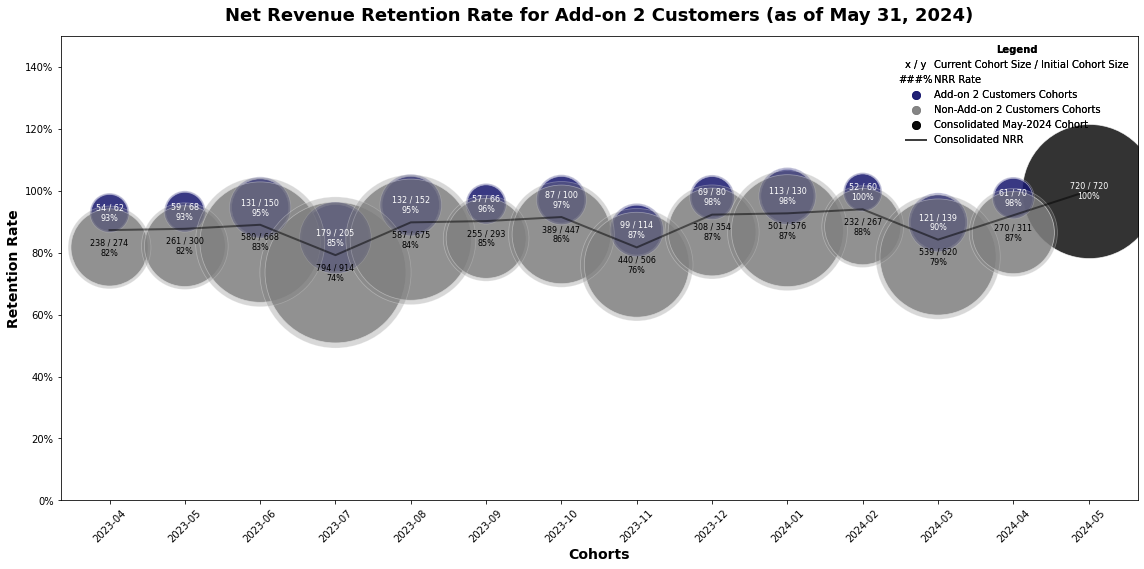

In [58]:
ex.generate_cohort_retention_bubble_chart(
    consolidated_cohorts,
    add_on_2_customers_cohorts,
    non_add_on_2_customers_cohorts,
    bubble_size_multiple=25,
    chart_title=f"""Net Revenue Retention Rate for Add-on 2 Customers (as of {last_month.strftime("%b %d, %Y")})""",
    addon_name="Add-on 2",
    customer_segment="Consolidated",
    y_axis_upper_bound=1.5,
)

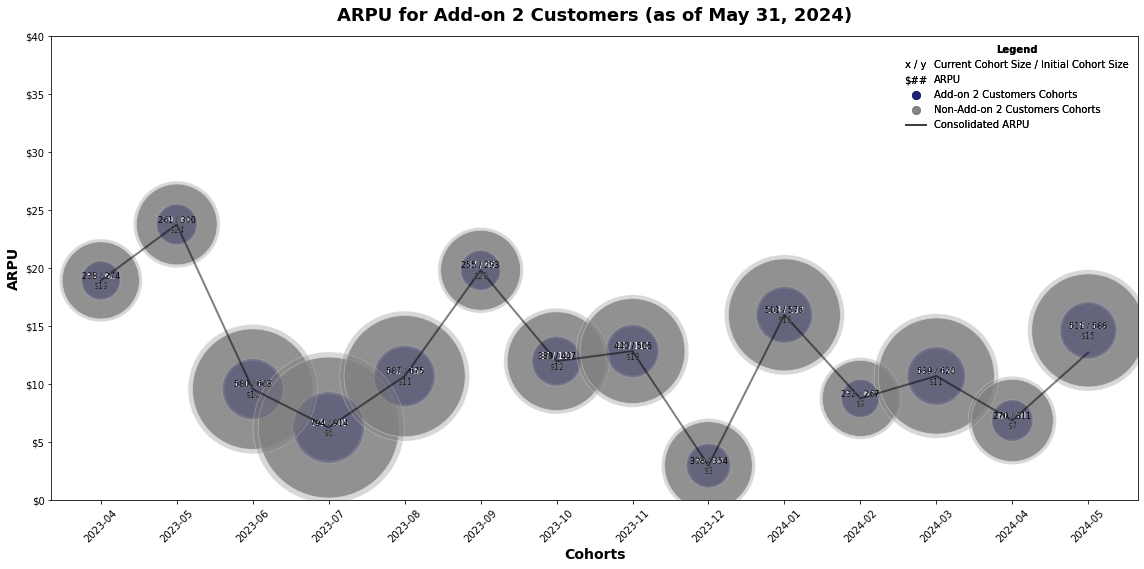

In [59]:
ex.generate_cohort_arpu_bubble_chart(
    consolidated_cohorts,
    add_on_2_customers_cohorts,
    non_add_on_2_customers_cohorts,
    bubble_size_multiple=25,
    chart_title=f"""ARPU for Add-on 2 Customers (as of {last_month.strftime("%b %d, %Y")})""",
    addon_name="Add-on 2",
    customer_segment="Consolidated",
    y_axis_upper_bound=40,
)

In [51]:
# these are the conditions that our cohort analysis is using to find the earliest month of a new business transaction by account
for i in df.month.sort_values(ascending=False).unique():
    print(
        f"""There are {df[
            (df.month == i) &
            (df.plan_type == "Base Plan") &
            (df.new_business > 0) &
            (df.cumulative_sum == 0)
    ].account_code.nunique():,} unique customers that belong to the {np.datetime64(df[df.month == i].month.values[0], "M")} cohort"""
    )

There are 0 unique customers that belong to the 2024-05 cohort
There are 0 unique customers that belong to the 2024-04 cohort
There are 0 unique customers that belong to the 2024-03 cohort
There are 0 unique customers that belong to the 2024-02 cohort
There are 0 unique customers that belong to the 2024-01 cohort
There are 0 unique customers that belong to the 2023-12 cohort
There are 0 unique customers that belong to the 2023-11 cohort
There are 0 unique customers that belong to the 2023-10 cohort
There are 1 unique customers that belong to the 2023-09 cohort
There are 12 unique customers that belong to the 2023-08 cohort
There are 91 unique customers that belong to the 2023-07 cohort
There are 618 unique customers that belong to the 2023-06 cohort
There are 4,986 unique customers that belong to the 2023-05 cohort
There are 39,522 unique customers that belong to the 2023-04 cohort


In [ ]:
df[df.mrr > 0].groupby("cohort").account_code.nunique()